# Deep learning course
## by **IA Expert Academy**
### RNN (Recurrent Neural Network )using stock exchange dataset Petrobras


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

In [4]:
train = pd.read_csv('petr4_treinamento.csv')
# drop all null row
train = train.dropna()
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0


In [5]:
# show all prices
train_series = train.iloc[:, 1:7].values
train_series

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [6]:
# converging to scaler between 0 and 1
normalizer = MinMaxScaler(feature_range=(0,1))
train_series_normalizer = normalizer.fit_transform(train_series)
train_series_normalizer

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [7]:
train_series_normalizer.shape

(1242, 6)

In [8]:
train_series_normalizer[:]

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [9]:
train_series_normalizer[1, 0]

0.7562984011627907

In [75]:
train_series_normalizer.shape

(1242, 6)

In [10]:
# Separate an array with unique prices, and another array set for 30 days
X = np.array([train_series_normalizer[i-30:i] for i in range(30, len(train_series_normalizer))])
y = np.array([train_series_normalizer[i,0] for i in range(30, len(train_series_normalizer))])

In [11]:
X.shape


(1212, 30, 6)

In [12]:
X.shape

(1212, 30, 6)

In [25]:
y.shape

(1212,)

In [76]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 100)             │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 30, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,451 (443.17 KB)

 Trainable params: 113,451 (443.17 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [78]:
#early stopping epochs 10 with don't achieviment 1e-10
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1)
# learning rate 0.2
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
# monitoring loss
mcp = ModelCheckpoint(filepath='weight.keras', monitor='loss', save_best_only=True, verbose = 1)

In [79]:
regressor.fit(X, y, epochs = 100, batch_size=32, callbacks=[es, rlr, mcp])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0771 - mean_absolute_error: 0.2030
Epoch 1: loss improved from inf to 0.03474, saving model to weight.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0760 - mean_absolute_error: 0.2012 - learning_rate: 0.0010
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0103 - mean_absolute_error: 0.0768
Epoch 2: loss improved from 0.03474 to 0.00969, saving model to weight.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0102 - mean_absolute_error: 0.0767 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0085 - mean_absolute_error: 0.0710
Epoch 3: loss improved from 0.00969 to 0.00808, saving model to weight.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0085 - mean_absolute_error: 0.0709 - learning_rate: 0.0010
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0076 - mean_absolute_error: 0.0681
Epoch 4: loss improved from 0.00808 to 0.00731, saving 

In [81]:
dataset_evaluate = pd.read_csv('petr4_teste.csv')
print(dataset_evaluate.shape)
dataset_evaluate.head()

(22, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [82]:
#predic open price
y_test = dataset_evaluate.iloc[:, 1:2].values
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [83]:
y_test.shape

(22, 1)

In [84]:
frames = [train, dataset_evaluate]

In [85]:
frames

[            Date       Open       High        Low      Close  Adj Close  \
 0     2013-01-02  19.990000  20.209999  19.690001  19.690001  18.086271   
 1     2013-01-03  19.809999  20.400000  19.700001  20.400000  18.738441   
 2     2013-01-04  20.330000  20.620001  20.170000  20.430000  18.766001   
 3     2013-01-07  20.480000  20.670000  19.950001  20.080000  18.444506   
 4     2013-01-08  20.110001  20.230000  19.459999  19.500000  17.911745   
 ...          ...        ...        ...        ...        ...        ...   
 1240  2017-12-25  15.750000  15.750000  15.750000  15.750000  15.718563   
 1241  2017-12-26  15.750000  15.990000  15.690000  15.970000  15.938125   
 1242  2017-12-27  15.990000  16.139999  15.980000  16.049999  16.017963   
 1243  2017-12-28  16.100000  16.129999  16.000000  16.100000  16.067865   
 1244  2017-12-29  16.100000  16.100000  16.100000  16.100000  16.067865   
 
           Volume  
 0     30182600.0  
 1     30552600.0  
 2     36141000.0  
 3    

In [86]:
entire_database = pd.concat(frames)
entire_database

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
17,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [87]:
entire_database = entire_database.drop('Date', axis = 1)

In [88]:
len(entire_database)

1264

In [89]:
# len(entire_database) - len(predict) - 30 => it's all necessary rows = 20 rows for predicts e less 30 previus date
x = entire_database[len(entire_database) - len(dataset_evaluate) - 30:].values
x

array([[1.6020000e+01, 1.6020000e+01, 1.6020000e+01, 1.6020000e+01,
        1.5988025e+01, 0.0000000e+00],
       [1.6150000e+01, 1.6309999e+01, 1.5850000e+01, 1.5900000e+01,
        1.5868263e+01, 4.5817800e+07],
       [1.6090000e+01, 1.6240000e+01, 1.5930000e+01, 1.6110001e+01,
        1.6077845e+01, 3.7444900e+07],
       [1.5980000e+01, 1.6260000e+01, 1.5940000e+01, 1.6190001e+01,
        1.6157686e+01, 1.5403600e+07],
       [1.6250000e+01, 1.6370001e+01, 1.6040001e+01, 1.6100000e+01,
        1.6067865e+01, 1.8790700e+07],
       [1.6010000e+01, 1.6020000e+01, 1.5780000e+01, 1.5870000e+01,
        1.5838324e+01, 2.8445800e+07],
       [1.5930000e+01, 1.6040001e+01, 1.5810000e+01, 1.5840000e+01,
        1.5808384e+01, 3.0429600e+07],
       [1.5870000e+01, 1.5920000e+01, 1.5320000e+01, 1.5330000e+01,
        1.5299401e+01, 4.5973000e+07],
       [1.5300000e+01, 1.5470000e+01, 1.4990000e+01, 1.5380000e+01,
        1.5349302e+01, 5.2811400e+07],
       [1.5340000e+01, 1.5770000e+01,

In [90]:
x.shape

(52, 6)

In [93]:
# change to scale 0 to 1
normalizer = MinMaxScaler(feature_range=(0,1))
train_series_normalizer = normalizer.fit_transform(train_series)
x = normalizer.transform(x)
x

array([[0.57267442, 0.56955889, 0.60900716, 0.58055013, 0.58055012,
        0.        ],
       [0.57897287, 0.58361604, 0.60030706, 0.57465622, 0.57465613,
        0.06555227],
       [0.57606589, 0.58022298, 0.60440123, 0.58497061, 0.58497053,
        0.05357303],
       [0.57073643, 0.58119244, 0.604913  , 0.58889988, 0.58889984,
        0.02203818],
       [0.58381783, 0.58652453, 0.61003076, 0.5844794 , 0.58447937,
        0.02688416],
       [0.57218992, 0.56955889, 0.59672467, 0.57318274, 0.57318271,
        0.04069787],
       [0.56831395, 0.57052841, 0.59825998, 0.57170926, 0.57170924,
        0.04353612],
       [0.56540698, 0.56471159, 0.57318321, 0.54666014, 0.54666008,
        0.06577432],
       [0.5377907 , 0.54289869, 0.55629478, 0.54911594, 0.54911591,
        0.07555813],
       [0.53972868, 0.55744062, 0.57011259, 0.5604126 , 0.56041253,
        0.06109702],
       [0.55474806, 0.55889481, 0.580348  , 0.55402753, 0.55402743,
        0.06269613],
       [0.54748062, 0

In [52]:
x.shape

(52, 6)

In [94]:
#
predict_history = np.array([x[i-30:i, 0:6] for i in range(30, 52)])
predict_history

array([[[0.57267442, 0.56955889, 0.60900716, 0.58055013, 0.58055012,
         0.        ],
        [0.57897287, 0.58361604, 0.60030706, 0.57465622, 0.57465613,
         0.06555227],
        [0.57606589, 0.58022298, 0.60440123, 0.58497061, 0.58497053,
         0.05357303],
        ...,
        [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
         0.03369652],
        [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
         0.02720006],
        [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
         0.        ]],

       [[0.57897287, 0.58361604, 0.60030706, 0.57465622, 0.57465613,
         0.06555227],
        [0.57606589, 0.58022298, 0.60440123, 0.58497061, 0.58497053,
         0.05357303],
        [0.57073643, 0.58119244, 0.604913  , 0.58889988, 0.58889984,
         0.02203818],
        ...,
        [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
         0.02720006],
        [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.584

In [95]:
predict_history.shape

(22, 30, 6)

In [96]:
final_predict = regressor.predict(predict_history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


In [97]:
final_predict

array([[0.5770301 ],
       [0.5807813 ],
       [0.5874057 ],
       [0.5965144 ],
       [0.6054193 ],
       [0.61270297],
       [0.6182197 ],
       [0.62058026],
       [0.6217961 ],
       [0.6240207 ],
       [0.6277002 ],
       [0.63408846],
       [0.6460577 ],
       [0.66124713],
       [0.67423046],
       [0.68223155],
       [0.6842298 ],
       [0.6890334 ],
       [0.6986754 ],
       [0.71510935],
       [0.73337305],
       [0.7446992 ]], dtype=float32)

In [98]:
train_series[:,0:1]

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [99]:
# the predict value is no final value, because the was normalized
normalizer_predict = MinMaxScaler(feature_range=(0,1))
normalizer_predict.fit_transform(train_series[:,0:1])
final_predict = normalizer_predict.inverse_transform(final_predict)

In [100]:
final_predict

array([[16.109901],
       [16.187325],
       [16.324053],
       [16.512056],
       [16.695854],
       [16.84619 ],
       [16.960054],
       [17.008776],
       [17.03387 ],
       [17.079786],
       [17.155731],
       [17.287586],
       [17.534632],
       [17.84814 ],
       [18.116116],
       [18.28126 ],
       [18.322502],
       [18.421648],
       [18.620659],
       [18.959856],
       [19.336819],
       [19.570591]], dtype=float32)

In [102]:
final_predict.mean()

17.555157

In [103]:
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [104]:
y_test.mean()

17.87454563636364

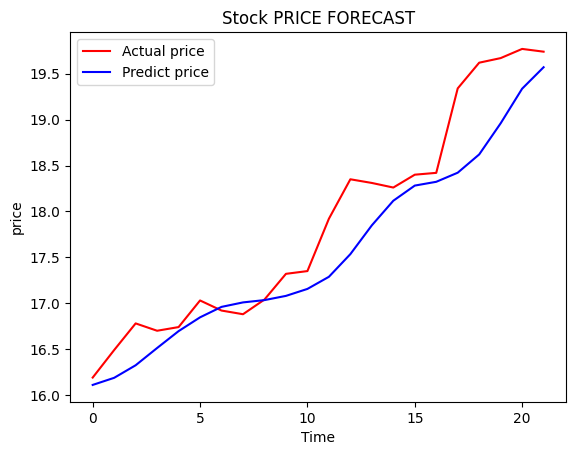

In [105]:
# evaluate
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, final_predict)
plt.plot(y_test, color = "red", label = "Actual price")
plt.plot(final_predict, color = "blue", label = "Predict price")
plt.title("Stock PRICE FORECAST")
plt.xlabel("Time")
plt.ylabel("price")
plt.legend();